<h1>Listen, Teil 2</h1>

In [1]:
l=[0..9]
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Hier wird die Liste selbst verändert

In [2]:
l.append(10)

In [3]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Hier wird l selbst nicht verändert, das Resultat wird als neues Objekt im Output zurückgegeben.

In [4]:
l+[4,7,32,5]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 7, 32, 5]

In [5]:
l*2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Zugriff auf Teillisten ähnlich wie in Matlab. Achtung: obere Grenze ist nicht inkludiert.

In [6]:
l[2:7]

[2, 3, 4, 5, 6]

In [7]:
l[2:10:2]

[2, 4, 6, 8]

Teillisten können auch direkt überschrieben werden.

In [8]:
l[2:10:2]=[42]*4

In [9]:
l

[0, 1, 42, 3, 42, 5, 42, 7, 42, 9, 10]

In [10]:
[42]*4

[42, 42, 42, 42]

<h2>Funktionale Programmierung (basierend auf Listen und Funktionen): map, filter, reduce</h2>

In [11]:
l=[0..9]
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

map(f,[x1,...,xn) werdet die Funktion f auf jedes Element der Liste an. Ergebnis: [f(x1),...,f(xn)]. Das wird allerdings nicht direkt als Liste zurückgegeben, sondern als map Objekt. Darüber kann man iterieren, aus Effizienzgründen werden die einzelnen Elemente erst dann bestimmt, wenn sie tatsächlich benötigt werden ("lazy evaluation").

In [12]:
l2=map(factorial,l)
l2

In [13]:
for x in l2:
    print(x)

1
1
2
6
24
120
720
5040
40320
362880


Über das map-Objekt kann nur einmal iteriert werden, danach ist es leer.

In [14]:
for x in l2:
    print(x)

In [15]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Das map-Objekt kann man auch einfach direkt in eine Liste umwandeln.

In [16]:
l2=list(map(factorial,l))
l2

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

filter(f,[x1,...,xn]) wählt aus der Liste jene Elemente aus, für die die Funktion f zu True evaluiert.

In [17]:
l3=filter(is_prime,l)
l3

Geliefert wird wieder ein iterierbares Objekt. Hier sieht man wieder: dieses wird nur einmal durchlaufen, einmal aufgerufene Objekte sind danach nicht mehr vorhanden.

In [18]:
next(l3)

2

In [19]:
list(l3)

[3, 5, 7]

In [20]:
list(l3)

[]

In [21]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<h2>List comprehensions</h2>

List comprehensions bieten eine angenehme, intuitive und leicht lesbare Möglichkeit, dieselbe Funktionalität wie map und filter zu erreichen.

In [22]:
list(map(factorial,l))

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

Dasselbe als list comprehension. Die Bedeutung des Codes sollte hier intuitiv klar sein.

In [23]:
[factorial(n) for n in l]

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

Filter als list comprehension.

In [24]:
[n for n in l if is_prime(n)]

[2, 3, 5, 7]

Beides kombiniert.

In [25]:
[factorial(p) for p in l if is_prime(p)]

[2, 6, 120, 5040]

Dasselbe mit map und filter: deutlich schwerer lesbar.

In [26]:
list(map(factorial,filter(is_prime,l)))

[2, 6, 120, 5040]

In [27]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

reduce(f,l) verschmilzt die Elemente der Liste paarweise, wobei iterativ auf je zwei Elemente die Funktion f angewandt wird. Z.B.  reduce(f,[x1,x2,x3,x4]) liefert f(f(f(x1,x2),x3),x4)

In [28]:
reduce(operator.add,l)

45

In [29]:
1+2+3+4+5+6+7+8+9

45

In [30]:
add(l)

45

In [31]:
reduce(max,l)

9

In [32]:
max(l)

9

<h1>Weitere Datentypen</h1>

In [33]:
L=[0..4]*2
L

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

<h2>Mengen: wie Listen, aber ohne Wiederholungen und Ordnung irrelevant</h2>

In [34]:
S=set(L)
S

{0, 1, 2, 3, 4}

In [35]:
parent(S)

<class 'set'>

In [36]:
S1=set([4,5,7,8])

In [37]:
S-S1

{0, 1, 2, 3}

In [38]:
S1={4,5,7,8}

In [39]:
S1

{4, 5, 7, 8}

In [40]:
parent(S1)

<class 'set'>

In [41]:
[1,2]==[2,1]

False

In [42]:
{1,2}=={2,1}

True

In [43]:
{1,2}=={1,2,2}

True

Vereinigung

In [44]:
S.union(S1)

{0, 1, 2, 3, 4, 5, 7, 8}

Addition funktioniert hier nicht.

In [45]:
S+S1

TypeError: unsupported operand type(s) for +: 'set' and 'set'

In [46]:
L=[4,3,2,1]*2
L

[4, 3, 2, 1, 4, 3, 2, 1]

Elegante Methode, um mehrfache Einträge einer Liste zu löschen (und die Liste "kanonisch" zu ordnen)

In [47]:
L=list(set(L))

In [48]:
L

[1, 2, 3, 4]

<h2>Tupel</h2>

Wie Listen, aber unveränderbar. 

In [49]:
T=(3,4,5)
T

(3, 4, 5)

Einträge eines Tupels können direkt Variablen zugewiesen werden. 

In [50]:
a,b,c=T

In [51]:
a

3

In [52]:
b

4

In [53]:
c

5

Das ist sehr praktisch und wird z.B. verwendet, wenn Funktionen mehrere Werte zurückgeben. Hier: Division mit Rest.

In [54]:
q,r=21.quo_rem(4)

In [55]:
q

5

In [56]:
r

1

Vertauschen zweier Variablen. 

Klassisch, mit einer zusätzlichen Buffervariable:

In [57]:
a=2
b=1

In [58]:
c=b
b=a
a=c

In [59]:
a

1

In [60]:
b

2

In einer Zeile mittels Tupeln:

In [61]:
a,b=b,a

In [62]:
a

2

In [63]:
b

1

Zugriff auf Einträge eines Tupels in Iterationen:

In [64]:
L=[(i,i^2,i^3) for i in [4,7,5,9]]
L

[(4, 16, 64), (7, 49, 343), (5, 25, 125), (9, 81, 729)]

Klassisch:

In [65]:
for T in L:
    print(T[0],T[2]-T[1])

4 48
7 294
5 100
9 648


Kürzer und leichter lesbar: Einträge gleich in der Iteration direkt benennen.

In [66]:
for i,s,c in L:
    print(i,c-s)

4 48
7 294
5 100
9 648


Der wesentliche Unterschied zwischen Listen und Tupeln ist, dass Listen im Nachhinein verändert werden können ("mutable"), Tubel aber nicht ("immutable").

In [67]:
L=[1,2,3]
L

[1, 2, 3]

In [68]:
L[1]=pi
L

[1, pi, 3]

In [69]:
T=(1,2,3)
T

(1, 2, 3)

In [70]:
T[1]=pi
T

TypeError: 'tuple' object does not support item assignment

<h2>Dictionaries</h2>

Listen haben Einträge indiziert mit 0,1,2,... 

Die Einträge von <b>dictionaries</b> können durch beliebige Objekte indiziert werden. 

Geschrieben mit {...} als Menge von Paaren der Form k:v, wobei k der Schlüssel/Index und v der zugehörige Wert ist.

In [71]:
D={'a':1, 'b':2, 25:15, ZZ:QQ}
D

{'a': 1, 'b': 2, 25: 15, Integer Ring: Rational Field}

In [72]:
D['b']

2

In [73]:
D[25]

15

In [74]:
D[4]

KeyError: 4

Zuweisung neuer Werte.

In [75]:
D[4]=72

In [76]:
D

{'a': 1, 'b': 2, 25: 15, Integer Ring: Rational Field, 4: 72}

Iteration über Tupel: geht über die <b>Schlüssel</b> 

In [77]:
for v in D:
    print(v)

a
b
25
Integer Ring
4


In [78]:
list(D.keys())

['a', 'b', 25, Integer Ring, 4]

In [79]:
list(D.values())

[1, 2, 15, Rational Field, 72]

In [80]:
for v in D:
    print(D[v])

1
2
15
Rational Field
72


Beispiel: mitspeichern von Funktionswerten. Wir haben gereits gesehen, dass der @cached_function Dekorator das automatisch macht. Jetzt können wir es auch sehr einfach händisch programmieren.

Automatisch (bereits gesehen, zu bevorzugen):

In [81]:
@cached_function
def fib(n):
    if n<2:
        return 1
    return fib(n-1)+fib(n-2)

Händisch mit Dictionary:

In [82]:
D={}
def fib(n):
    global D
    if n in D:
        return D[n]
    if n<2:
        D[n]=1
    else:
        D[n]=fib(n-1)+fib(n-2)    
    return D[n]

In [83]:
fib(4)

5

In [84]:
fib(31)

2178309

<h1>Rechnen mit symbolische Ausdrücken</h1>

In [85]:
reset('x')

In [86]:
x

x

In [87]:
parent(x)

Symbolic Ring

In [88]:
x^2+4

x^2 + 4

x ist automatisch als (mathematische) Variable definiert. Alle anderen Variablen müssen erst als solche definiert werden.

In [89]:
y

NameError: name 'y' is not defined

In [90]:
var('y')

y

In [91]:
parent(y)

Symbolic Ring

In [92]:
x+y

x + y

In [93]:
(x+y)^3

(x + y)^3

Symbolische Ausdrücke werden nicht automatisch umgeformt/ausmultipliziert. 

expand: ausmultiplizieren

In [94]:
f=expand((x+y)^3)

In [95]:
f

x^3 + 3*x^2*y + 3*x*y^2 + y^3

factor: zusammenfassen

In [96]:
factor(f)

(x + y)^3

In [97]:
factor(4562)

2 * 2281

Obwohl beide obige Funktionen factor() heißen, geschehen hier verschiedene Dinge. Die globale Funktion factor() ruft im ersten Fall die Methode <b>Expression.factor()</b> auf, im zweiten Fall die Methode <b>Integer.factor()</b>

Viele mathematische Funktionen sind als symbolische Ausdrücke vordefiniert.

In [98]:
sin(x)

sin(x)

In [99]:
parent(_)

Symbolic Ring

Ableiten ist aufgrund der diversen Ableitungsregeln ein sehr mechanischer Prozess. Sage kennt die Ableitungen elementarer Funktionen

In [100]:
diff(sin(x),x)

cos(x)

Unter Anwendung der Ableitungsregeln können auch komplizierte Kombinationen aus diesen Funktionen zuverlässig abgeleitet werden.

In [101]:
diff(exp(cos(x^5+3*x))/sin(x),x)

-(5*x^4 + 3)*e^(cos(x^5 + 3*x))*sin(x^5 + 3*x)/sin(x) - cos(x)*e^(cos(x^5 + 3*x))/sin(x)^2

In [102]:
show(_)

-(5*x^4 + 3)*e^(cos(x^5 + 3*x))*sin(x^5 + 3*x)/sin(x) - cos(x)*e^(cos(x^5 + 3*x))/sin(x)^2

Integration ist <b>viel</b> schwieriger als ableiten. Einfache Integrale sind kein Problem für Sage

In [103]:
integrate(sin(x),x)

-cos(x)

Viele elementare Funktionen (Funktionen gebaut aus Polynomen, exp(), log() und trigonometrischen Funktionen mittels +,-,*,/ und Hintereinanderausführung) haben keine elementare Stammfunktion. Einige davon kann Sage dennoch integrieren, weil es entsprechende <b>spezielle Funktionen</b> kennt, mit denen sich die Stammfunktion ausdrücken lässt.

In [104]:
integrate(exp(x^2),x)

-1/2*I*sqrt(pi)*erf(I*x)

In [105]:
show(_)

-1/2*I*sqrt(pi)*erf(I*x)

In [106]:
erf?

Type:            LazyImport
String form:     erf
File:            /opt/sagemath/sage-10.1/src/sage/misc/lazy_import.pyx
Docstring:      
   The error function.

   The error function is defined for real values as

      \operatorname{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}
      dt.

   This function is also defined for complex values, via analytic
   continuation.

   EXAMPLES:

   We can evaluate numerically:

      sage: erf(2)
      erf(2)
      sage: erf(2).n()
      0.995322265018953
      sage: erf(2).n(100)
      0.99532226501895273416206925637
      sage: erf(ComplexField(100)(2+3j))
      -20.829461427614568389103088452 + 8.6873182714701631444280787545*I

   Basic symbolic properties are handled by Sage and Maxima:

      sage: x = var("x")
      sage: diff(erf(x),x)
      2*e^(-x^2)/sqrt(pi)
      sage: integrate(erf(x),x)
      x*erf(x) + e^(-x^2)/sqrt(pi)

   ALGORITHM:

   Sage implements numerical evaluation of the error function via the
   "erf()" function from

Das stößt aber schnell an seine Grenzen

In [107]:
integrate(sin(exp(sqrt(x))),x)

integrate(sin(e^sqrt(x)), x)

In [108]:
show(_)

integrate(sin(e^sqrt(x)), x)

Prinzipiell gibt es einen Algorithmus von <b>Risch</b> (1968), der zu jeder elementaren Funktion, die eine elementare Stammfunktion hat, diese berechnet, und sonst ausgibt, dass die Funktion keine elementare Stammfunktion hat. Dieser Algorithmus ist jedoch extrem kompliziert und (meines Wissens) noch in keinem Computeralgebrasystem vollständig implementiert. Stattdessen verwenden Cmputeralgebrasysteme bei komplizierteren Integralen oft <b>heuristische Methoden</b>, die leider auch falsche Ergebnisse liefern können.

Das folgende Integral wird inzwischen richtig berechnet (wenn auch mittels Heuristik, daher die Warnung). In Sage 8 lieferte es noch das falsche Ergebnis -1, ohne Warnung.

In [109]:
integrate(abs(cos(x)),x,0,pi)

Warning, integration of abs or sign assumes constant sign by intervals (correct if the argument is real):
Check [abs(cos(sageVARx))]
Discontinuities at zeroes of cos(sageVARx) were not checked


2

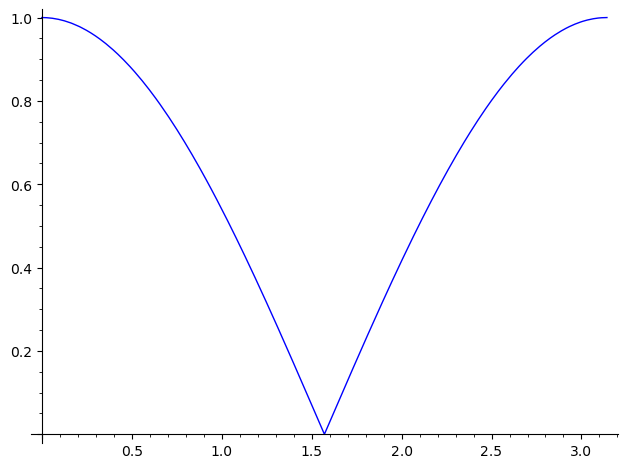

In [110]:
plot(abs(cos(x)),x,0,pi)

Es gibt immer noch viele Integrale, die falsch berechnet werden.

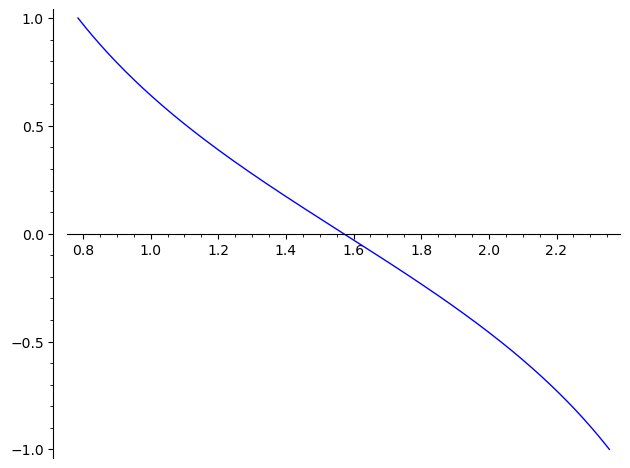

In [111]:
plot(cot(x),x,pi/4,3*pi/4)

In [112]:
integrate(cot(x),x,pi/4,3*pi/4)      # richtig

0

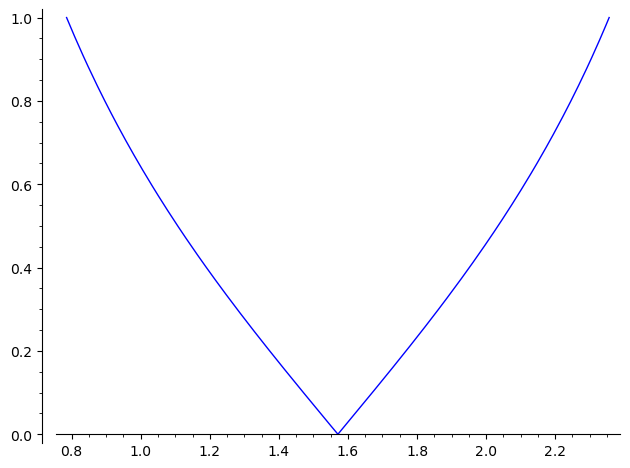

In [113]:
plot(abs(cot(x)),x,pi/4,3*pi/4)

In [114]:
integrate(abs(cot(x)),x,pi/4,3*pi/4)   # richtig

Warning, integration of abs or sign assumes constant sign by intervals (correct if the argument is real):
Check [abs(cos(sageVARx))]
Discontinuities at zeroes of cos(sageVARx) were not checked


log(2)

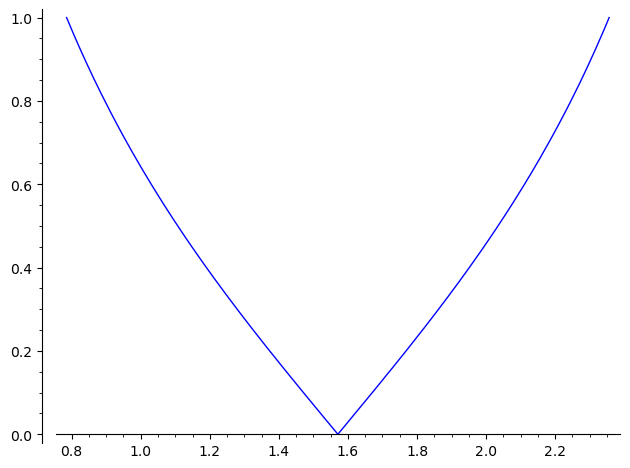

In [115]:
plot(sqrt(cot(x)^2),x,pi/4,3*pi/4)

Obwohl es mathematisch dieselbe Funktion ist, wie vorher, wird hier (ohne Warnung) das offensichtlich falsche Ergebnis 0 ausgegeben!

In [116]:
integrate(sqrt(cot(x)^2),x,pi/4,3*pi/4)

0

<h1>Einfache Grafik</h1>

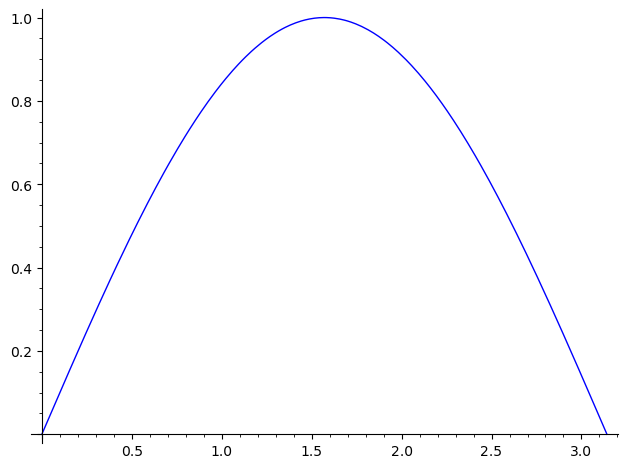

In [117]:
G=plot(sin(x),x,0,pi)
G

In [118]:
parent(G)

<class 'sage.plot.graphics.Graphics'>

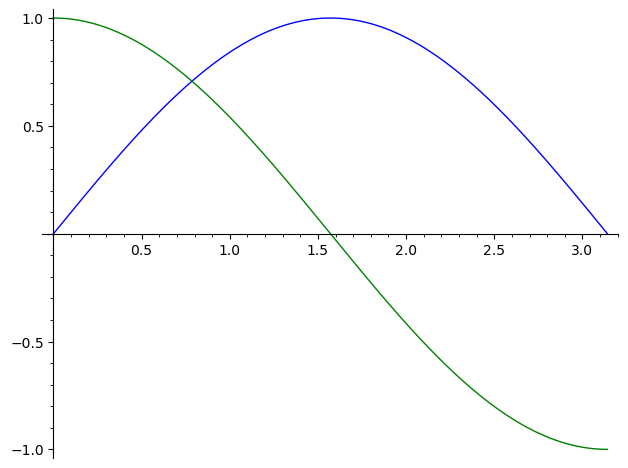

In [119]:
G += plot(cos(x),x,0,pi,color='green')
G

In [120]:
G += point((pi/2,1), color='black', size=40)

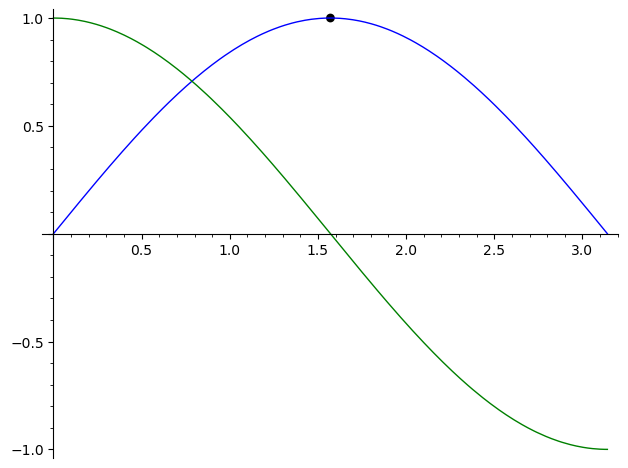

In [121]:
G

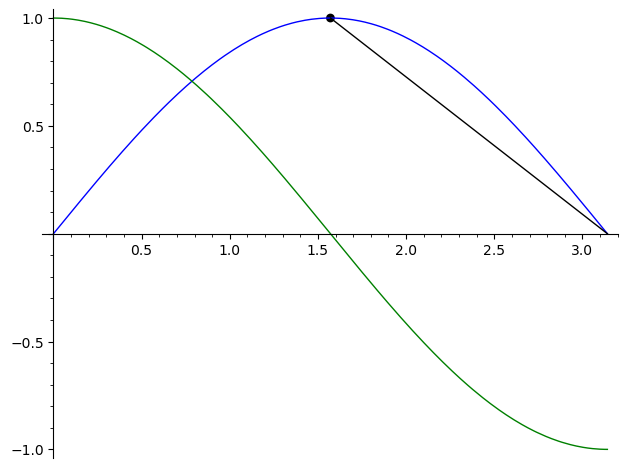

In [122]:
G += line([(pi/2,1),(pi,0)],color='black')
G

<h1>Lösen von Gleichungen</h1>

Quadratische Lösungsformel

In [123]:
solve(x^2-2==0,x)

[x == -sqrt(2), x == sqrt(2)]

In [124]:
parent(x^2-2==0)

Symbolic Ring

Kubische Lösungsformel von Cardano

In [125]:
solve(x^3-3==0,x)

[x == 1/2*I*3^(5/6) - 1/2*3^(1/3), x == -1/2*I*3^(5/6) - 1/2*3^(1/3), x == 3^(1/3)]

In [126]:
show(_[0])

x == 1/2*I*3^(5/6) - 1/2*3^(1/3)

Quartische Lösungsformel von Ferrari

In [127]:
solve(x^4+x^3-x^2-2,x)

[x == -1/12*sqrt(3)*sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) - 1/2*sqrt(-1/3*(3*sqrt(821)*sqrt(3) - 100)^(1/3) + 5/2*sqrt(3)/sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) + 23/3/(3*sqrt(821)*sqrt(3) - 100)^(1/3) + 11/6) - 1/4, x == -1/12*sqrt(3)*sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) + 1/2*sqrt(-1/3*(3*sqrt(821)*sqrt(3) - 100)^(1/3) + 5/2*sqrt(3)/sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) + 23/3/(3*sqrt(821)*sqrt(3) - 100)^(1/3) + 11/6) - 1/4, x == 1/12*sqrt(3)*sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) - 1/2*sqrt(-1/3*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 5/2*sqrt(3)/sqrt((4*(3*sqrt(821)*sqrt(3) 

In [128]:
show(_[0])

x == -1/12*sqrt(3)*sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) - 1/2*sqrt(-1/3*(3*sqrt(821)*sqrt(3) - 100)^(1/3) + 5/2*sqrt(3)/sqrt((4*(3*sqrt(821)*sqrt(3) - 100)^(2/3) + 11*(3*sqrt(821)*sqrt(3) - 100)^(1/3) - 92)/(3*sqrt(821)*sqrt(3) - 100)^(1/3)) + 23/3/(3*sqrt(821)*sqrt(3) - 100)^(1/3) + 11/6) - 1/4

Für Polynome 5. und höheren Grades lassen sich die Lösungen im Allgemeinen nicht mehr als Wurzelausdrücke schreiben. (Das heißt nicht nur, dass noch niemand eine solche Formel gefunden hat. Der <b>Satz von Abel-Ruffini</b> zeigt, dass es keine quintische Lösungsformel geben kann.)

In [129]:
solve(x^5-x+2==0,x)

[0 == x^5 - x + 2]

Gleichungen mit transzendenten Funktionen sind noch schwieriger. Im Allgemeinen ist es nicht möglich, die Lösungen geschlossen auszudrücken. Selbst bei sehr einfachen Gleichungen mit trigonometrischen Funktionen kann es schon vorkommen, dass Computeralgebrasysteme wie Sage Lösungen übersehen.

In [130]:
solve(sin(x)==0,x)

[x == 0]

Hier wird ein anderer Lösungsalgorithmus erzwungen, nun werden alle Lösungen gefunden. Die Variable z... in der Lösung gibt einen ganzzahligen Parameter an.

In [131]:
solve(sin(x)==0,x,to_poly_solve='force')

[x == pi*z9032]

Auch mehrmaliges Anschreiben derselben Gleichung führt hier zu allen Lösungen. Fazit: Gleichungslösen in Computeralgebrasystemen ist mit Vorsicht zu genießen!

In [132]:
solve([sin(x)==0,sin(x)==0],x)

[[x == pi*z9071]]

Ungleichungen:

In [133]:
solve(1/(x-1)<8,x)

[[x < 1], [x > (9/8)]]

Bereits relativ einfache Ungleichungen kann Sage nicht mehr sinnvoll lösen.

In [134]:
solve(cos(x)<1/2,x)

[[-2*cos(x) + 1 > 0]]

In [135]:
arccos(1/2)

1/3*pi

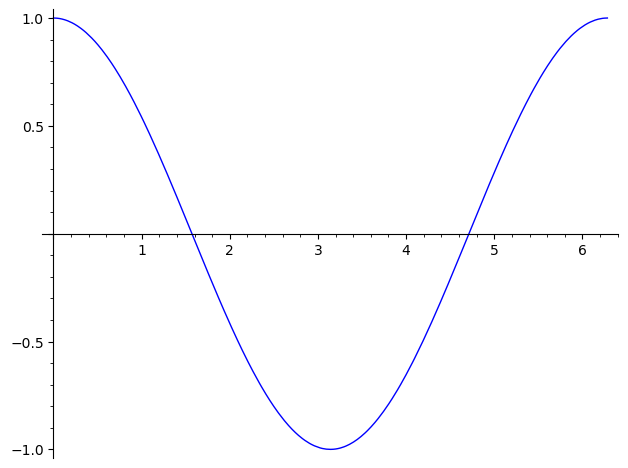

In [136]:
plot(cos(x),x,0,2*pi)

In [137]:
solve(cos(x)<1/2,x,to_poly_solve='force')

[[-2*cos(x) + 1 > 0]]

<h1>Polynome</h1>

Mit Polynomen können Computeralgebrasysteme gut exakt rechnen. Wenn man nur Polynome braucht, sollte man in Sage statt im SymbolicRing in Polynomringen rechnen.

In [138]:
QQ

Rational Field

Ring der Polynome über den rationalen Zahlen:

In [139]:
Px=QQ[x]
Px

Univariate Polynomial Ring in x over Rational Field

x bezeichnet immer noch die Variable im SymbolicRing

In [140]:
x

x

In [141]:
parent(x)

Symbolic Ring

Hier wird x nun als die Variable im Polynomring festgesetzt

In [142]:
x=Px(x)

In [143]:
parent(x)

Univariate Polynomial Ring in x over Rational Field

Polynome werden immer automatisch ausmultipliziert

In [144]:
(x+5)^3

x^3 + 15*x^2 + 75*x + 125

In [145]:
p=x^2-3

Nullstellen mit .roots(). Ohne Argument werden nur Lösungen im Grundkörper, hier QQ, gesucht.

In [146]:
p.roots()

[]

Lösungen in anderen Ringen/Körpern: 

In [147]:
p.roots(RR)

[(-1.73205080756888, 1), (1.73205080756888, 1)]

In [148]:
p.roots(QQbar)

[(-1.732050807568878?, 1), (1.732050807568878?, 1)]

QQbar ist der Körper aller <b>algebraischen Zahlen</b>, also aller komplexen Zahlen, die Nullstellen von Polynomen über QQ sind. Mit diesen kann Sage <b>exakt</b> rechnen. Die Gleitkommadarstellungen oben dienen nur der Darstellung, intern wird exakt gerechnet.

Wir extrahieren die erste Nullstelle: der erste Wert des ersten Tupels im obigen Ergebnis

In [149]:
r1=_[0][0]

In [150]:
r1

-1.732050807568878?

In [151]:
parent(r1)

Algebraic Field

Beliebig genaue Auswertung

In [152]:
r1.n(digits=500)

-1.7320508075688772935274463415058723669428052538103806280558069794519330169088000370811461867572485756756261414154067030299699450949989524788116555120943736485280932319023055820679748201010846749232650153123432669033228866506722546689218379712270471316603678615880190499865373798593894676503475065760507566183481296061009476021871903250831458295239598329977898245082887144638329173472241639845878553976679580638183536661108431737808943783161020883055249016700235207111442886959909563657970871684980729

In [153]:
a=r1+1
a

-0.732050807568878?

Das Polynom, das die neue algebraische Zahl r1+1 als Nullstelle hat:  (intern wird in QQbar immer mit diesen Polynomen gerechnet, zusammen mit hinreichend genauen Approximationen um die Nullstelle eindeutig zu identifizieren.)

In [154]:
a.minpoly()

x^2 - 2*x - 2